# Data

In [130]:
# pip3 install pandas numpy seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [131]:
data = pd.read_csv('data/train.csv')

In [132]:
data.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [133]:
data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [134]:
data.shape

(593994, 13)

# Encoding

In [135]:
missing_values = data.isnull().sum()

missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'Missing values:': missing_values, 'Missing percent:': missing_percent})

print(missing_df)

                      Missing values:  Missing percent:
id                                  0               0.0
annual_income                       0               0.0
debt_to_income_ratio                0               0.0
credit_score                        0               0.0
loan_amount                         0               0.0
interest_rate                       0               0.0
gender                              0               0.0
marital_status                      0               0.0
education_level                     0               0.0
employment_status                   0               0.0
loan_purpose                        0               0.0
grade_subgrade                      0               0.0
loan_paid_back                      0               0.0


In [136]:
data = data.drop(columns=['id'])
duplicates = data.duplicated().sum()

print('Number of duplicates:', duplicates)

Number of duplicates: 0


In [137]:
data1 = pd.get_dummies(data[['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']], dtype = int, drop_first = True)
data2 = data.drop(columns=['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade'])

data_encoded = pd.concat([data1, data2], axis = 1)

print(data_encoded)

        gender_Male  gender_Other  marital_status_Married  \
0                 0             0                       0   
1                 1             0                       1   
2                 1             0                       0   
3                 0             0                       0   
4                 1             0                       1   
...             ...           ...                     ...   
593989            0             0                       0   
593990            1             0                       0   
593991            0             0                       1   
593992            1             0                       0   
593993            1             0                       1   

        marital_status_Single  marital_status_Widowed  \
0                           1                       0   
1                           0                       0   
2                           1                       0   
3                           1          

In [138]:
data_hm1 = data_encoded[[col for col in data_encoded.columns if col.startswith('grade_')] + ['loan_paid_back']]

print(data_hm1)

        grade_subgrade_A2  grade_subgrade_A3  grade_subgrade_A4  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  0   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
593989                  0                  0                  0   
593990                  0                  0                  0   
593991                  0                  0                  0   
593992                  0                  0                  0   
593993                  0                  0                  0   

        grade_subgrade_A5  grade_subgrade_B1  grade_subgrade_B2  \
0                       0                  0                  0   
1                       0                  0                 

In [139]:
data_hm2 = data_encoded.drop(columns=[col for col in data_encoded.columns if col.startswith('grade_')])

print(data_hm2)

        gender_Male  gender_Other  marital_status_Married  \
0                 0             0                       0   
1                 1             0                       1   
2                 1             0                       0   
3                 0             0                       0   
4                 1             0                       1   
...             ...           ...                     ...   
593989            0             0                       0   
593990            1             0                       0   
593991            0             0                       1   
593992            1             0                       0   
593993            1             0                       1   

        marital_status_Single  marital_status_Widowed  \
0                           1                       0   
1                           0                       0   
2                           1                       0   
3                           1          

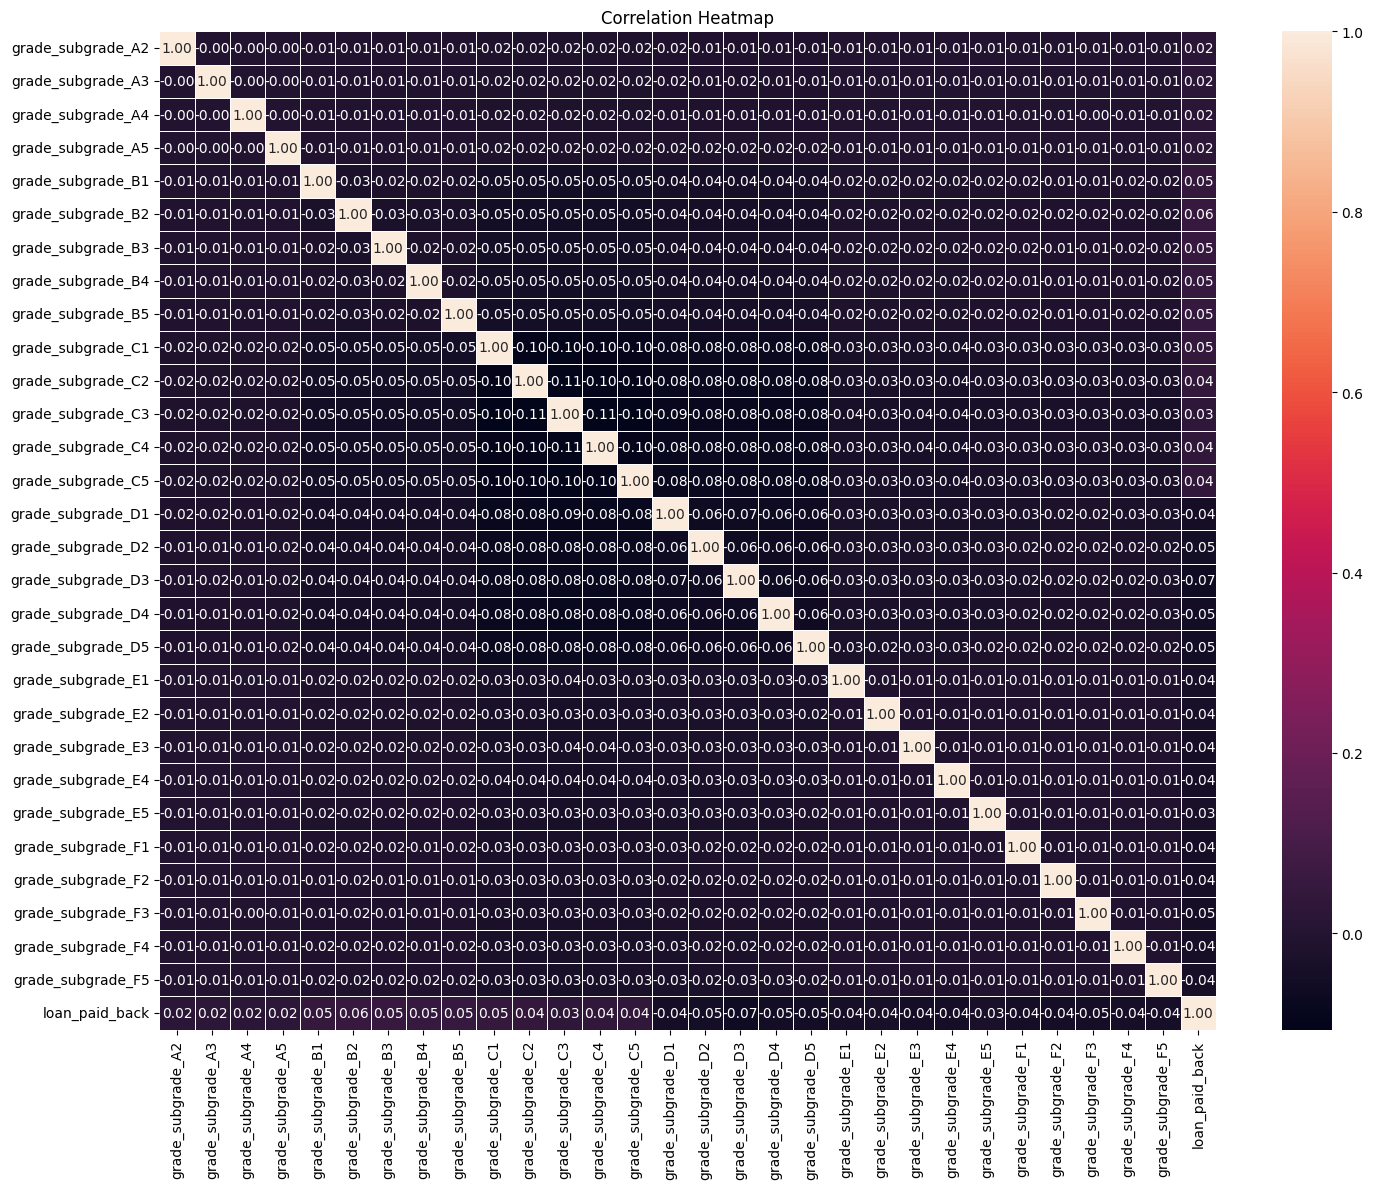

In [140]:
corr = data_hm1.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

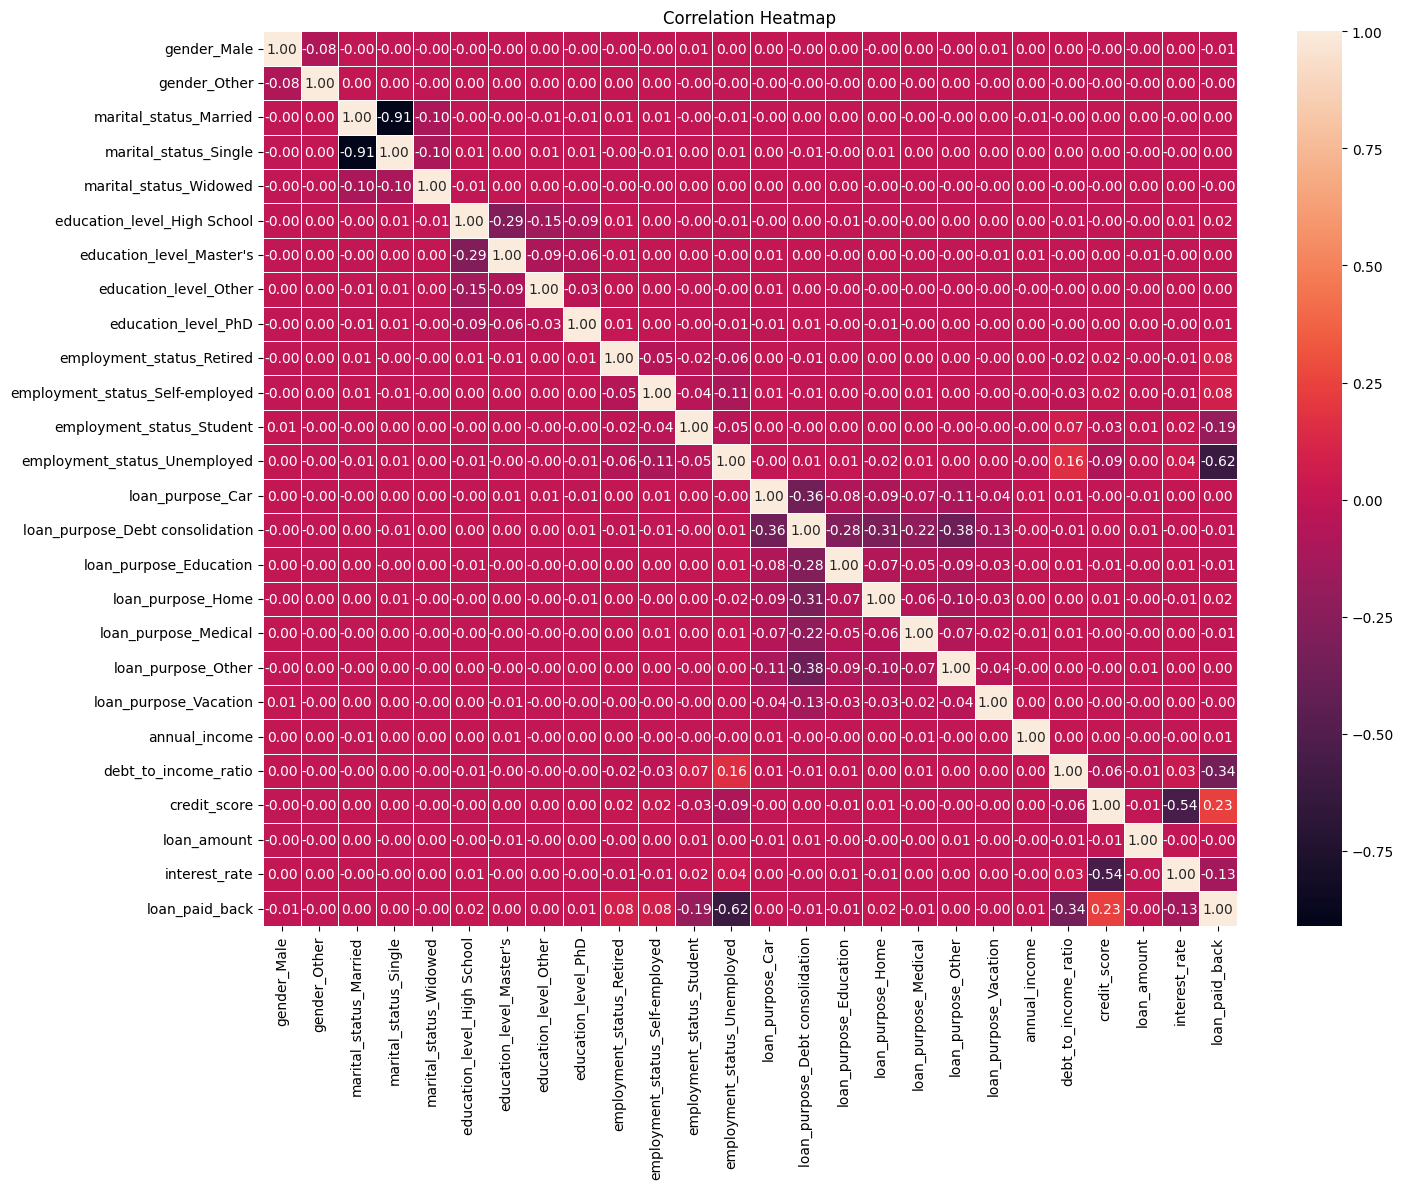

In [141]:
corr = data_hm2.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()